# Text Analytics and Natural Language Processing using Graphs

In the following we will focus on analyzing textual documents and leverage on graph analysis in order to identify insight and extract relevant information. 

In particular in the following we will show you how to:

* Extract structured information from text by using NLP techniques and models
* Build different type of graphs starting from the information extracted in the previous point
* Analyze the graph

### Load Dataset

In [1]:
import nltk 

In [2]:
import numpy as np

import pandas as pd
import networkx as nx

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt

In [4]:
nltk.download('reuters')

[nltk_data] Downloading package reuters to /home/ubuntu/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


True

In [5]:
from nltk.corpus import reuters

In [6]:
corpus = pd.DataFrame([
    {"id": _id, "clean_text": reuters.raw(_id).replace("\n", ""), "label": reuters.categories(_id)}
    for _id in reuters.fileids()
]).set_index("id")

In [7]:
corpus.iloc[10]["clean_text"]

'SUBROTO SAYS INDONESIA SUPPORTS TIN PACT EXTENSION  Mines and Energy Minister Subroto  confirmed Indonesian support for an extension of the sixth  International Tin Agreement (ITA), but said a new pact was not  necessary.      Asked by Reuters to clarify his statement on Monday in  which he said the pact should be allowed to lapse, Subroto said  Indonesia was ready to back extension of the ITA.      "We can support extension of the sixth agreement," he said.  "But a seventh accord we believe to be unnecessary."      The sixth ITA will expire at the end of June unless a  two-thirds majority of members vote for an extension.  '

In [8]:
from collections import Counter
len(Counter([label for document_labels in corpus["label"] for label in document_labels]).most_common())

90

In [9]:
corpus.head()

,clean_text,label
id,,
test/14826,ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RI...,[trade]
test/14828,CHINA DAILY SAYS VERMIN EAT 7-12 PCT GRAIN STO...,[grain]
test/14829,JAPAN TO REVISE LONG-TERM ENERGY DEMAND DOWNWA...,"[crude, nat-gas]"
test/14832,THAI TRADE DEFICIT WIDENS IN FIRST QUARTER Th...,"[corn, grain, rice, rubber, sugar, tin, trade]"
test/14833,INDONESIA SEES CPO PRICE RISING SHARPLY Indon...,"[palm-oil, veg-oil]"


### Language Detection

In [10]:
import langdetect

In [11]:
import numpy as np

def getLanguage(text: str):
    try:
        return langdetect.detect(text)
    except: 
        return np.nan

In [12]:
corpus["language"] = corpus["clean_text"].apply(getLanguage)

In [14]:
corpus["language"].value_counts().head(10)

language
en    9895
sv     433
de     371
sw      29
so      24
nl       8
pt       7
vi       6
et       3
ro       2
Name: count, dtype: int64

In [15]:
corpus.head()

,clean_text,label,language
id,,,
test/14826,ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RI...,[trade],en
test/14828,CHINA DAILY SAYS VERMIN EAT 7-12 PCT GRAIN STO...,[grain],en
test/14829,JAPAN TO REVISE LONG-TERM ENERGY DEMAND DOWNWA...,"[crude, nat-gas]",en
test/14832,THAI TRADE DEFICIT WIDENS IN FIRST QUARTER Th...,"[corn, grain, rice, rubber, sugar, tin, trade]",en
test/14833,INDONESIA SEES CPO PRICE RISING SHARPLY Indon...,"[palm-oil, veg-oil]",en


Using fasttext

In [16]:
!curl -w GET https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.ftz > lid.176.ftz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  916k  100  916k    0     0  6470k      0 --:--:-- --:--:-- --:--:-- 6496k


In [10]:
import fasttext

m = fasttext.load_model("lid.176.ftz")
def getLanguage(text: str):
    return m.predict(text)[0][0].replace("__label__", "")

In [11]:
corpus["language"] = corpus["clean_text"].apply(getLanguage)

In [12]:
corpus["language"].value_counts().head(10)

language
en    10278
de       90
ja       73
it       67
sv       52
zh       48
es       31
fr       27
eu       20
eo       12
Name: count, dtype: int64

In [13]:
corpus["language"].value_counts().head(10)

language
en    10278
de       90
ja       73
it       67
sv       52
zh       48
es       31
fr       27
eu       20
eo       12
Name: count, dtype: int64

In [14]:
corpus[corpus["language"]=="ja"].iloc[5]["clean_text"]

'USDA - U.S. 1986/87 ENDING CORN STOCKS  5,240 MLN BU, WHEAT 1,848 MLN, SOYBEANS 610 MLN  USDA - U.S. 1986/87 ENDING CORN STOCKS  5,240 MLN BU, WHEAT 1,848 MLN, SOYBEANS 610 MLN  '

### NLP Enrichment

In [15]:
import spacy

In order to download the model from the Spacy library, please issue the following command in a shell 


<pre><code>
python -m spacy download en_core_web_md
</code></pre>


In [16]:
nlp = spacy.load('en_core_web_md')

In [17]:
corpus["parsed"] = corpus["clean_text"].apply(nlp)

In [19]:
corpus.loc["test/14832"]["clean_text"]

"THAI TRADE DEFICIT WIDENS IN FIRST QUARTER  Thailand's trade deficit widened to 4.5  billion baht in the first quarter of 1987 from 2.1 billion a  year ago, the Business Economics Department said.      It said Janunary/March imports rose to 65.1 billion baht  from 58.7 billion. Thailand's improved business climate this  year resulted in a 27 pct increase in imports of raw materials  and semi-finished products.      The country's oil import bill, however, fell 23 pct in the  first quarter due to lower oil prices.      The department said first quarter exports expanded to 60.6  billion baht from 56.6 billion.      Export growth was smaller than expected due to lower  earnings from many key commodities including rice whose  earnings declined 18 pct, maize 66 pct, sugar 45 pct, tin 26  pct and canned pineapples seven pct.      Products registering high export growth were jewellery up  64 pct, clothing 57 pct and rubber 35 pct.  "

In [20]:
from spacy import displacy

In [21]:
displacy.render(corpus.loc["test/14832"]["parsed"], style='ent', jupyter=True)

#### Export corpus Dataframe

In [22]:
corpus.head()

,clean_text,label,language,parsed
id,,,,
test/14826,ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RI...,[trade],en,"(ASIAN, EXPORTERS, FEAR, DAMAGE, FROM, U.S.-JA..."
test/14828,CHINA DAILY SAYS VERMIN EAT 7-12 PCT GRAIN STO...,[grain],en,"(CHINA, DAILY, SAYS, VERMIN, EAT, 7, -, 12, PC..."
test/14829,JAPAN TO REVISE LONG-TERM ENERGY DEMAND DOWNWA...,"[crude, nat-gas]",en,"(JAPAN, TO, REVISE, LONG, -, TERM, ENERGY, DEM..."
test/14832,THAI TRADE DEFICIT WIDENS IN FIRST QUARTER Th...,"[corn, grain, rice, rubber, sugar, tin, trade]",en,"(THAI, TRADE, DEFICIT, WIDENS, IN, FIRST, QUAR..."
test/14833,INDONESIA SEES CPO PRICE RISING SHARPLY Indon...,"[palm-oil, veg-oil]",en,"(INDONESIA, SEES, CPO, PRICE, RISING, SHARPLY,..."


In [23]:
corpus[["clean_text", "label", "language", "parsed"]].to_pickle("corpus.p")

## Graph Generation

In the following, we will show you how to create two different kind of graphs out of a corpus of documents:

* Knowledge base graphs, where the subject-verb-object relation will be encoded to build a semantic graph 
* Bipartite graphs, linking documents with the entities/keywords appearing therein

### Knowledge base

In [6]:
import pandas as pd

corpus = pd.read_pickle("corpus.p")

In [7]:
from subject_object_extraction import findSVOs

In [8]:
corpus["triplets"] = corpus["parsed"].apply(lambda x: findSVOs(x, output="obj"))

In [9]:
corpus.head()

,clean_text,label,language,parsed,triplets
id,,,,,
test/14826,ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RI...,[trade],en,"(ASIAN, EXPORTERS, FEAR, DAMAGE, FROM, U.S.-JA...","[(EXPORTERS, (FEAR, False), DAMAGE), (Japan, (..."
test/14828,CHINA DAILY SAYS VERMIN EAT 7-12 PCT GRAIN STO...,[grain],en,"(CHINA, DAILY, SAYS, VERMIN, EAT, 7, -, 12, PC...","[(STOCKS, (showed, False), consume), (paper, (..."
test/14829,JAPAN TO REVISE LONG-TERM ENERGY DEMAND DOWNWA...,"[crude, nat-gas]",en,"(JAPAN, TO, REVISE, LONG, -, TERM, ENERGY, DEM...","[(Ministry, (revise, False), outlook), (MITI, ..."
test/14832,THAI TRADE DEFICIT WIDENS IN FIRST QUARTER Th...,"[corn, grain, rice, rubber, sugar, tin, trade]",en,"(THAI, TRADE, DEFICIT, WIDENS, IN, FIRST, QUAR...","[(Products, (registering, False), growth), (re..."
test/14833,INDONESIA SEES CPO PRICE RISING SHARPLY Indon...,"[palm-oil, veg-oil]",en,"(INDONESIA, SEES, CPO, PRICE, RISING, SHARPLY,...","[(oil, (told, False), reporters), (Prices, (ar..."


In [10]:
edge_list = [
    {"id": _id, "source": source.lemma_.lower(), "target": target.lemma_.lower(), "edge": edge.lemma_.lower()}
    for _id, triplets in corpus["triplets"].items()
    for (source, (edge, neg), target) in triplets
]

In [11]:
edges = pd.DataFrame(edge_list)

In [12]:
edges["edge"].value_counts().head(10)

edge
be         5476
have       2151
include    1712
tell       1419
buy        1177
sell       1162
take        976
make        950
give        944
acquire     790
Name: count, dtype: int64

In [13]:
edges["edge"].value_counts().head(10)

edge
be         5476
have       2151
include    1712
tell       1419
buy        1177
sell       1162
take        976
make        950
give        944
acquire     790
Name: count, dtype: int64

In [14]:
import networkx as nx

In [15]:
G=nx.from_pandas_edgelist(edges, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

In [16]:
len(G.nodes)

7450

In [17]:
def plotDistribution(serie: pd.Series, nbins: int, minValue=None, maxValue=None):
    _minValue=int(np.floor(np.log10(minValue if minValue is not None else serie.min())))
    _maxValue=int(np.ceil(np.log10(maxValue if maxValue is not None else serie.max())))
    bins = [0] + list(np.logspace(_minValue, _maxValue, nbins)) + [np.inf]
    serie.hist(bins=bins)
    plt.xscale("log")

In [18]:
def graphSummary(graph, bins=10):
    print(nx.info(graph))
    plt.figure(figsize=(20, 8))
    plt.subplot(1,2,1)
    degrees = pd.Series({k: v for k, v in nx.degree(graph)})
    plt.yscale("log")
    plotDistribution(degrees, bins)
    try:
        plt.subplot(1,2,2)
        allEdgesWeights = pd.Series({(d[0], d[1]): d[2]["weight"] for d in graph.edges(data=True)})
        plotDistribution(allEdgesWeights, bins)
        plt.yscale("log")
    except:
        pass

In [19]:
print(nx.info(G))

Name: 
Type: MultiDiGraph
Number of nodes: 7450
Number of edges: 56394
Average in degree:   7.5697
Average out degree:   7.5697


Name: 
Type: MultiDiGraph
Number of nodes: 7450
Number of edges: 56394
Average in degree:   7.5697
Average out degree:   7.5697


/home/ubuntu/.pyenv/versions/py3.8/lib/python3.8/site-packages/matplotlib/axes/_axes.py:6827: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


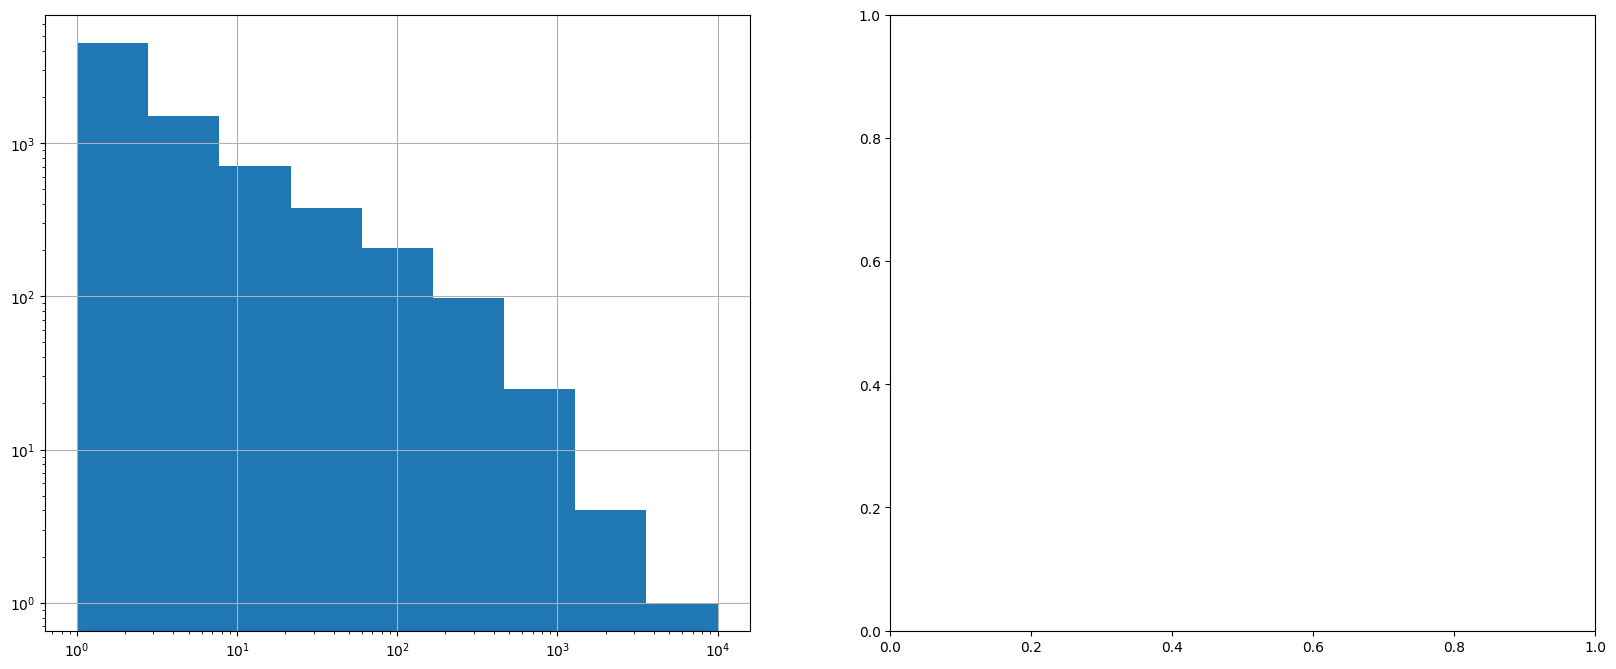

In [20]:
graphSummary(G, bins=10)

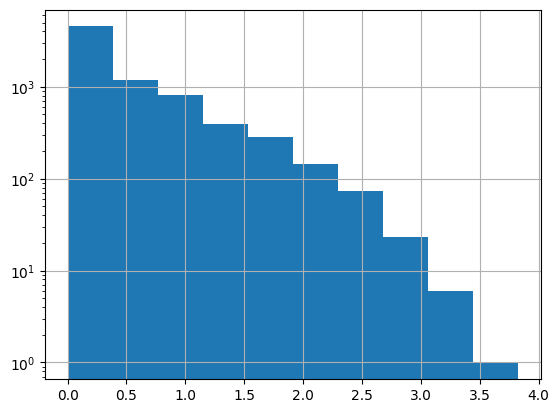

In [21]:
import numpy as np
np.log10(pd.Series({k: v for k, v in nx.degree(G)}).sort_values(ascending=False)).hist()
plt.yscale("log")

Analysis of a certain relation

In [22]:
edges.head()

,id,source,target,edge
0,test/14826,exporter,damage,fear
1,test/14826,japan,fear,raise
2,test/14826,row,damage,inflict
3,test/14826,they,correspondent,tell
4,test/14826,move,sentiment,boost


In [23]:
e = edges[(edges["source"]!=" ") & (edges["target"]!=" ") & (edges["edge"]=="lend")]

In [24]:
G=nx.from_pandas_edgelist(e, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

In [25]:
import os

plt.figure(figsize=(13, 6))

pos = nx.spring_layout(G, k=1.2) # k regulates the distance between nodes

nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos, font_size=12)

# plt.show()
# plt.savefig(os.path.join(".", "KnowledgeGraph.png"), dpi=300, format="png")

TypeError: '_AxesStack' object is not callable

<Figure size 1300x600 with 0 Axes>

## Bipartite Graph

Let's start by extracting the keywords from the documents

In [28]:
import gensim

In [29]:
from gensim.summarization import keywords 

In [30]:
text = corpus["clean_text"][0]
keywords(text, words=10, split=True, scores=True, pos_filter=('NN', 'JJ'), lemmatize=True)

[('trading', 0.4615130639538534),
 ('said', 0.3159855693494514),
 ('export', 0.269155382495807),
 ('import', 0.17462010006456904),
 ('japanese electronics', 0.13609326263790272),
 ('industry', 0.1286043740379775),
 ('minister', 0.12229815662000476),
 ('japan', 0.11434500812642387),
 ('year', 0.10483992409352452)]

In [31]:
corpus["keywords"] = corpus["clean_text"].apply(
    lambda text: keywords(text, words=10, split=True, scores=True, pos_filter=('NN', 'JJ'), lemmatize=True)
)

In [32]:
corpus.head()

,clean_text,label,language,parsed,triplets,keywords
id,,,,,,
test/14826,ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RI...,[trade],en,"(ASIAN, EXPORTERS, FEAR, DAMAGE, FROM, U.S.-JA...","[(EXPORTERS, (FEAR, False), DAMAGE), (Japan, (...","[(trading, 0.4615130639538531), (said, 0.31598..."
test/14828,CHINA DAILY SAYS VERMIN EAT 7-12 PCT GRAIN STO...,[grain],en,"(CHINA, DAILY, SAYS, VERMIN, EAT, 7, -, 12, PC...","[(STOCKS, (showed, False), consume), (paper, (...","[(vermin, 0.31206143802871766), (daily, 0.2611..."
test/14829,JAPAN TO REVISE LONG-TERM ENERGY DEMAND DOWNWA...,"[crude, nat-gas]",en,"(JAPAN, TO, REVISE, LONG, -, TERM, ENERGY, DEM...","[(Ministry, (revise, False), outlook), (MITI, ...","[(energy, 0.3857636092660119), (demand, 0.3479..."
test/14832,THAI TRADE DEFICIT WIDENS IN FIRST QUARTER Th...,"[corn, grain, rice, rubber, sugar, tin, trade]",en,"(THAI, TRADE, DEFICIT, WIDENS, IN, FIRST, QUAR...","[(Products, (registering, False), growth), (re...","[(pct, 0.5457455609144308), (export, 0.2656069..."
test/14833,INDONESIA SEES CPO PRICE RISING SHARPLY Indon...,"[palm-oil, veg-oil]",en,"(INDONESIA, SEES, CPO, PRICE, RISING, SHARPLY,...","[(oil, (told, False), reporters), (Prices, (ar...","[(indonesia, 0.24104282355029355), (harahap, 0..."


In [33]:
def extractEntities(ents, minValue=1, typeFilters=["GPE", "ORG", "PERSON"]):
    entities = pd.DataFrame([
        {"lemma": e.lemma_, "lower": e.lemma_.lower(), "type": e.label_}
        for e in ents if hasattr(e, "label_")
    ])

    if len(entities)==0:
        return pd.DataFrame()
    
    g = entities.groupby(["type", "lower"])

    summary = pd.concat({
        "alias": g.apply(lambda x: x["lemma"].unique()), 
        "count": g["lower"].count()
    }, axis=1)
    
    summary = summary[summary["count"]>1]

    subselection = list(set(summary.index.get_level_values("type")).intersection(typeFilters))

    return summary.loc[pd.IndexSlice[subselection, :, :]]
    
def getOrEmpty(parsed, _type):
    try:
        return list(parsed.loc[_type]["count"].sort_values(ascending=False).to_dict().items())
    except:
        return []

def toField(ents):
    typeFilters=["GPE", "ORG", "PERSON"]
    parsed = extractEntities(ents, 1, typeFilters)
    return pd.Series({_type: getOrEmpty(parsed, _type) for _type in typeFilters})
    

In [34]:
entities = corpus["parsed"].apply(lambda x: toField(x.ents))

In [35]:
merged = pd.concat([corpus, entities], axis=1) 

In [36]:
merged.head()

,clean_text,label,language,parsed,triplets,keywords,GPE,ORG,PERSON
id,,,,,,,,,
test/14826,ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RI...,[trade],en,"(ASIAN, EXPORTERS, FEAR, DAMAGE, FROM, U.S.-JA...","[(EXPORTERS, (FEAR, False), DAMAGE), (Japan, (...","[(trading, 0.4615130639538531), (said, 0.31598...","[(u.s., 14), (japan, 12), (taiwan, 3), (austra...",[],[]
test/14828,CHINA DAILY SAYS VERMIN EAT 7-12 PCT GRAIN STO...,[grain],en,"(CHINA, DAILY, SAYS, VERMIN, EAT, 7, -, 12, PC...","[(STOCKS, (showed, False), consume), (paper, (...","[(vermin, 0.31206143802871766), (daily, 0.2611...","[(china, 2)]",[],[]
test/14829,JAPAN TO REVISE LONG-TERM ENERGY DEMAND DOWNWA...,"[crude, nat-gas]",en,"(JAPAN, TO, REVISE, LONG, -, TERM, ENERGY, DEM...","[(Ministry, (revise, False), outlook), (MITI, ...","[(energy, 0.3857636092660119), (demand, 0.3479...","[(japan, 2)]","[(miti, 4)]",[]
test/14832,THAI TRADE DEFICIT WIDENS IN FIRST QUARTER Th...,"[corn, grain, rice, rubber, sugar, tin, trade]",en,"(THAI, TRADE, DEFICIT, WIDENS, IN, FIRST, QUAR...","[(Products, (registering, False), growth), (re...","[(pct, 0.5457455609144308), (export, 0.2656069...","[(thailand, 2)]",[],[]
test/14833,INDONESIA SEES CPO PRICE RISING SHARPLY Indon...,"[palm-oil, veg-oil]",en,"(INDONESIA, SEES, CPO, PRICE, RISING, SHARPLY,...","[(oil, (told, False), reporters), (Prices, (ar...","[(indonesia, 0.24104282355029355), (harahap, 0...","[(indonesia, 4), (malaysia, 2)]","[(cpo, 3)]","[(harahap, 2)]"


We finally create the bipartite graph

In [37]:
edges = pd.DataFrame([
    {"source": _id, "target": keyword, "weight": score, "type": _type}
    for _id, row in merged.iterrows()
    for _type in ["keywords", "GPE", "ORG", "PERSON"] 
    for (keyword, score) in row[_type]
])

In [38]:
G = nx.Graph()
G.add_nodes_from(edges["source"].unique(), bipartite=0)
G.add_nodes_from(edges["target"].unique(), bipartite=1)
G.add_edges_from([
    (row["source"], row["target"])
    for _, row in edges.iterrows()
])

In [39]:
document_nodes = {n for n, d in G.nodes(data=True) if d["bipartite"] == 0}
entity_nodes = {n for n, d in G.nodes(data=True) if d["bipartite"] == 1}

In [40]:
nodes_with_low_degree = {n for n, d in nx.degree(G, nbunch=entity_nodes) if d<5}

In [41]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 25930
Number of edges: 100716
Average degree:   7.7683


In [42]:
edges.to_pickle("bipartiteEdges.p")

In [137]:
from networkx.algorithms.bipartite.projection import overlap_weighted_projected_graph

### Entity-Entity Graph Projection

In [138]:
subGraph = G.subgraph(set(G.nodes) - nodes_with_low_degree)

In [139]:
entityGraph = overlap_weighted_projected_graph(
    subGraph, 
    {n for n, d in subGraph.nodes(data=True) if d["bipartite"] == 1}
)

In [140]:
len(entityGraph.nodes())

2384

In [141]:
degrees = pd.Series({k: v for k, v in nx.degree(entityGraph)})

/home/ubuntu/.pyenv/versions/py3.8/lib/python3.8/site-packages/matplotlib/axes/_axes.py:6703: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


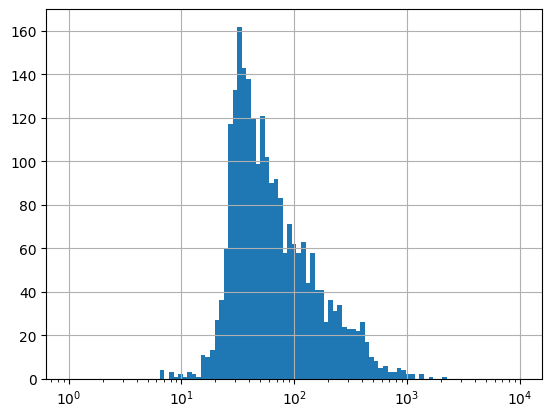

In [142]:
plotDistribution(degrees, 100)

In [143]:
print(nx.info(entityGraph))

Name: 
Type: Graph
Number of nodes: 2384
Number of edges: 120651
Average degree: 101.2173


In [144]:
allEdgesWeights = pd.Series({(d[0], d[1]): d[2]["weight"] for d in entityGraph.edges(data=True)})

/home/ubuntu/.pyenv/versions/py3.8/lib/python3.8/site-packages/matplotlib/axes/_axes.py:6703: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


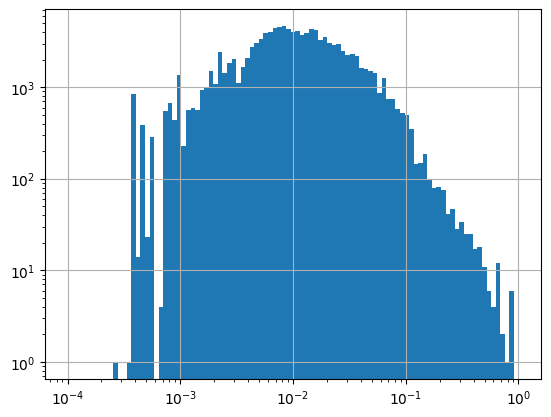

In [145]:
plotDistribution(allEdgesWeights, 100)
plt.yscale("log")

In [146]:
filteredEntityGraph = entityGraph.edge_subgraph(
    [edge for edge in entityGraph.edges if entityGraph.edges[edge]["weight"]>0.05]
)

In [147]:
print(nx.info(filteredEntityGraph))

Name: 
Type: Graph
Number of nodes: 2273
Number of edges: 8145
Average degree:   7.1667


#### Local and global properties of the graph 

In [148]:
globalKpis = [{
    "shortest_path": nx.average_shortest_path_length(_graph),
    "clustering_coefficient": nx.average_clustering(_graph),
    "global_efficiency": nx.global_efficiency(_graph)
} for components in nx.connected_components(filteredEntityGraph) 
    for _graph in [nx.subgraph(filteredEntityGraph, components)]]

In [149]:
pd.concat([
    pd.DataFrame(globalKpis), 
    pd.Series([len(c) for c in nx.connected_components(filteredEntityGraph)])
], axis=1)

,shortest_path,clustering_coefficient,global_efficiency,0
0,4.720367,0.208423,0.227148,2265
1,1.500000,0.000000,0.750000,4
2,1.000000,0.000000,1.000000,2
3,1.000000,0.000000,1.000000,2


In [150]:
pd.Series([len(c) for c in nx.connected_components(filteredEntityGraph)]).sum()

2273

In [151]:
globalKpis[0]

{'shortest_path': 4.720366773531775,
 'clustering_coefficient': 0.2084231652138552,
 'global_efficiency': 0.22714758272368463}

In [152]:
# nx.write_gexf(filteredEntityGraph, "filteredEntityGraph.gexf")

In [153]:
betweeness = nx.betweenness_centrality(filteredEntityGraph)

In [154]:
_betweeness = pd.Series(betweeness)

/home/ubuntu/.pyenv/versions/py3.8/lib/python3.8/site-packages/matplotlib/axes/_axes.py:6703: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


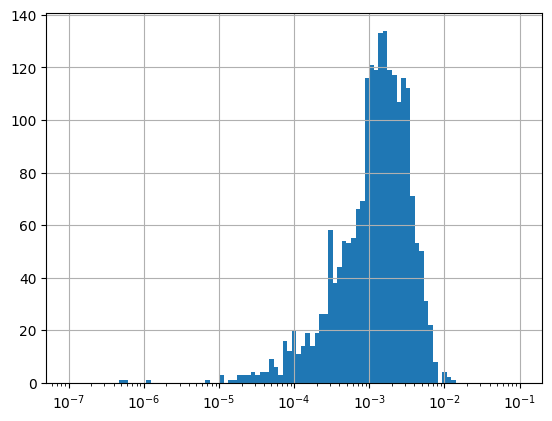

In [155]:
plotDistribution(_betweeness[_betweeness>0], 100)

/Users/deusebio/.pyenv/versions/3.7.6/envs/ml-book-7/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6694: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


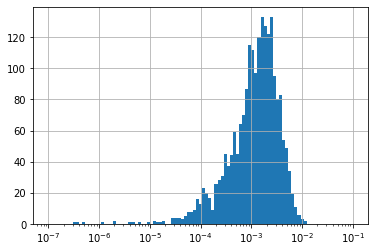

In [75]:
plotDistribution(_betweeness[_betweeness>0], 100)

In [156]:
pageRanks = pd.Series(nx.pagerank(filteredEntityGraph))

In [157]:
degrees = pd.Series({k: v for k, v in nx.degree(filteredEntityGraph)})

In [158]:
kpis = pd.concat({
    "pageRank": pageRanks, 
    "degrees": degrees, 
    "betweeness": _betweeness
}, axis=1)

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

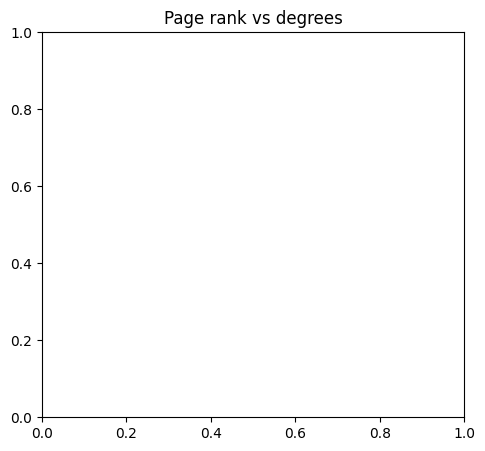

In [159]:
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plt.title("Page rank vs degrees")
plt.plot(kpis["pageRank"], kpis["degrees"], '.', color="tab:blue")
plt.xlabel("page rank")
plt.ylabel("degree")
plt.xscale("log")
plt.yscale("log")

plt.subplot(1,2,2)
plt.title("Page rank vs betweeness")
plt.plot(kpis["pageRank"], kpis["betweeness"], '.', color="tab:blue")
plt.xlabel("page rank")
plt.ylabel("betweeness")
plt.xscale("log")
plt.yscale("log")
plt.ylim([1E-5, 2E-2])

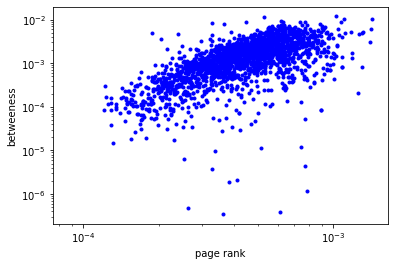

In [80]:
plt.figure(figsize=(6,4))
plt.plot(kpis["pageRank"], kpis["betweeness"], 'b.')
plt.xlabel("page rank")
plt.ylabel("betweeness")
plt.xscale("log")
plt.yscale("log")

/Users/deusebio/.pyenv/versions/3.7.6/envs/ml-book-7/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6694: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


Text(0.5, 1.0, 'Edge Weight Distribution')

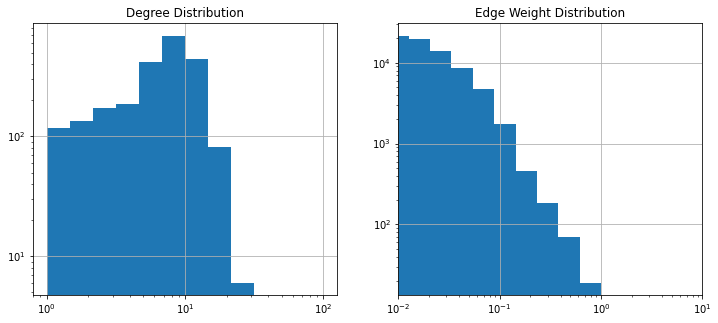

In [81]:
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plotDistribution(degrees, 13)
plt.yscale("log")
plt.title("Degree Distribution")

plt.subplot(1,2,2)
plotDistribution(allEdgesWeights, 20)
plt.xlim([1E-2, 10])
plt.yscale("log")
plt.title("Edge Weight Distribution")


In [82]:
allEdgesWeights = pd.Series({(d[0], d[1]): d[2]["weight"] for d in filteredEntityGraph.edges(data=True)})

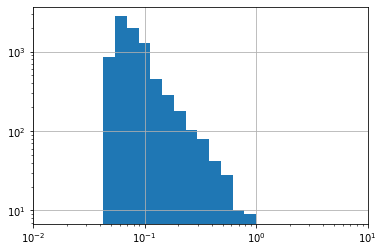

In [83]:
plotDistribution(allEdgesWeights, 20)
plt.xlim([1E-2, 10])
plt.yscale("log")

#### Visualization of the Network

In [160]:
#Create network layout for visualizations
spring_pos = nx.spring_layout(filteredEntityGraph)

In [161]:
default_edge_color = 'gray'
default_node_color = '#407cc9'
enhanced_node_color = '#f5b042'
enhanced_edge_color = '#cc2f04'

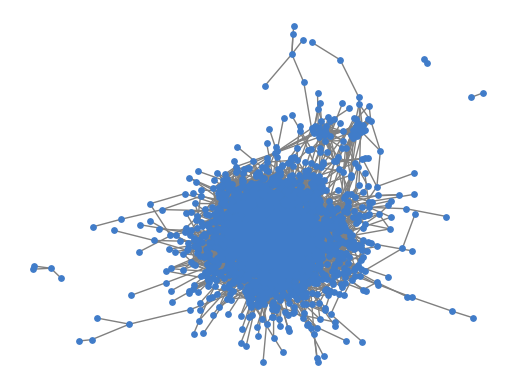

In [162]:
plt.axis("off")
nx.draw_networkx(filteredEntityGraph, pos=spring_pos, node_color=default_node_color, 
                 edge_color=default_edge_color, with_labels=False, node_size=15)

#### Community detection

In [163]:
import community

In [164]:
communities = pd.Series(community.best_partition(filteredEntityGraph))

Text(0, 0.5, '# Members')

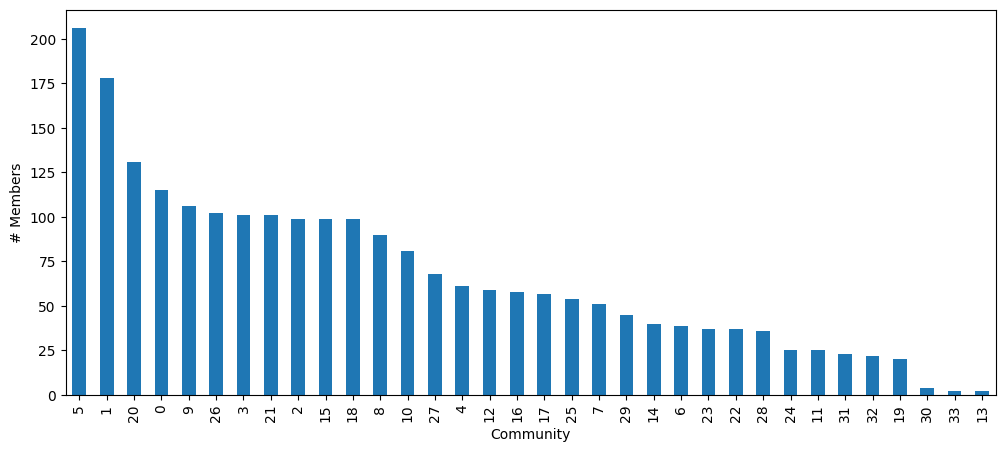

In [165]:
communities.value_counts().sort_values(ascending=False).plot(kind="bar", figsize=(12, 5))
plt.xlabel("Community")
plt.ylabel("# Members")

In [166]:
communities.loc["turkish"]

4

In [187]:
for comm_index in set(communities.values):
    nodes = communities[communities==comm_index].index
    print(f"{comm_index}:" + ",".join(nodes[:10]))

0:drought,parent,temperatures,aires,harvested,hours,estimated,fourth,start,cane
1:miyazawa,shanghai,leading,yen,received,oaks,measures,chips,reagan,open
2:diesel,federated,originally,fob,wireless,telecommunications,ratio,excessive,furniture,pioneer
3:tomorrow,allegheny,fla,volcker,viacom,wells,alan,vulcan,shoe,begins
4:acquire,mercury,officers,dumping,self,order,cinema,noranda,mark,greek
5:rights,qintex,lifts,discontinued operations,brace,myers,stations,distributor,tvx,productivity
6:pipe,opening,waste management,approvals,rotterdam,black,elevator,early,van,margins
7:jobless,accounting,instruments,actually,agencies,proxy,pension,insurance benefits,walker,hoechst
8:ounces,hanson,privately held,beach,angeles,audio,trust,independent,corrects,banner
9:warships,congressional,improvement,emirates,attack,iran,navy,tehran,korean,merchant
10:hostile,block,chain,buyers,champion,revenue,speculation,holder,crown,specialty
11:equipment,foreign exchange,write,corporate,operation,big,allis,cds,bolide

In [192]:
comm_index = 28
nodes = communities[communities==comm_index].index

In [193]:
smallGrap = nx.subgraph(filteredEntityGraph, nbunch=nodes)

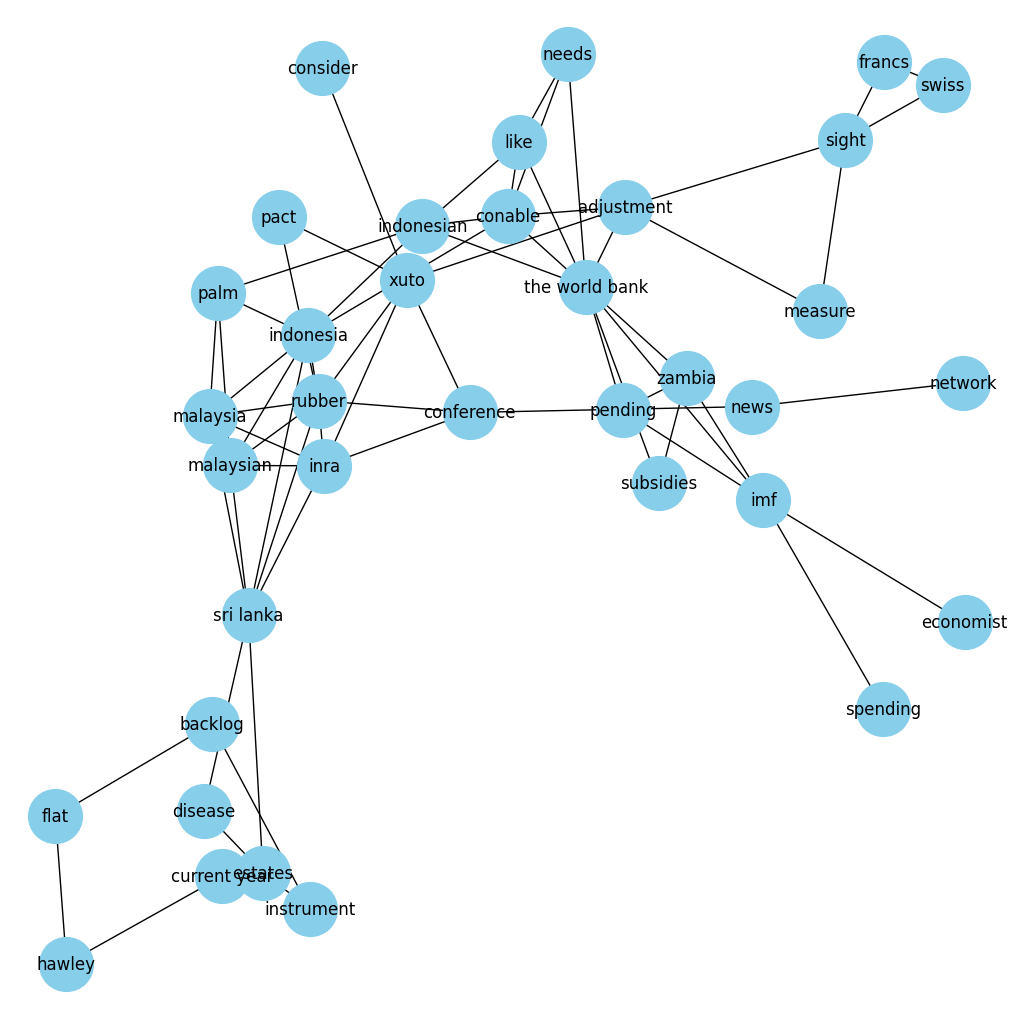

In [194]:
plt.figure(figsize=(10,10))

pos = nx.spring_layout(smallGrap) # k regulates the distance between nodes

nx.draw(smallGrap, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)

# plt.show()
# plt.savefig(os.path.join(".", "CloseUp.png"), dpi=300, format="png")

Here we show a Bipartite Closeup of the cluster

In [195]:
bipartiteCloseup = subGraph.edge_subgraph(
    {e for e in subGraph.edges() if len(set(e).intersection(nodes))>0}
)

deg = nx.degree(bipartiteCloseup)

smallGrap = nx.subgraph(bipartiteCloseup, {n for n, d in bipartiteCloseup.nodes(data=True) if d["bipartite"]==1 or deg[n]>1})

In [196]:
len([n for n, d in bipartiteCloseup.nodes(data=True) if d["bipartite"]==0])

435

In [197]:
len(nodes)

36

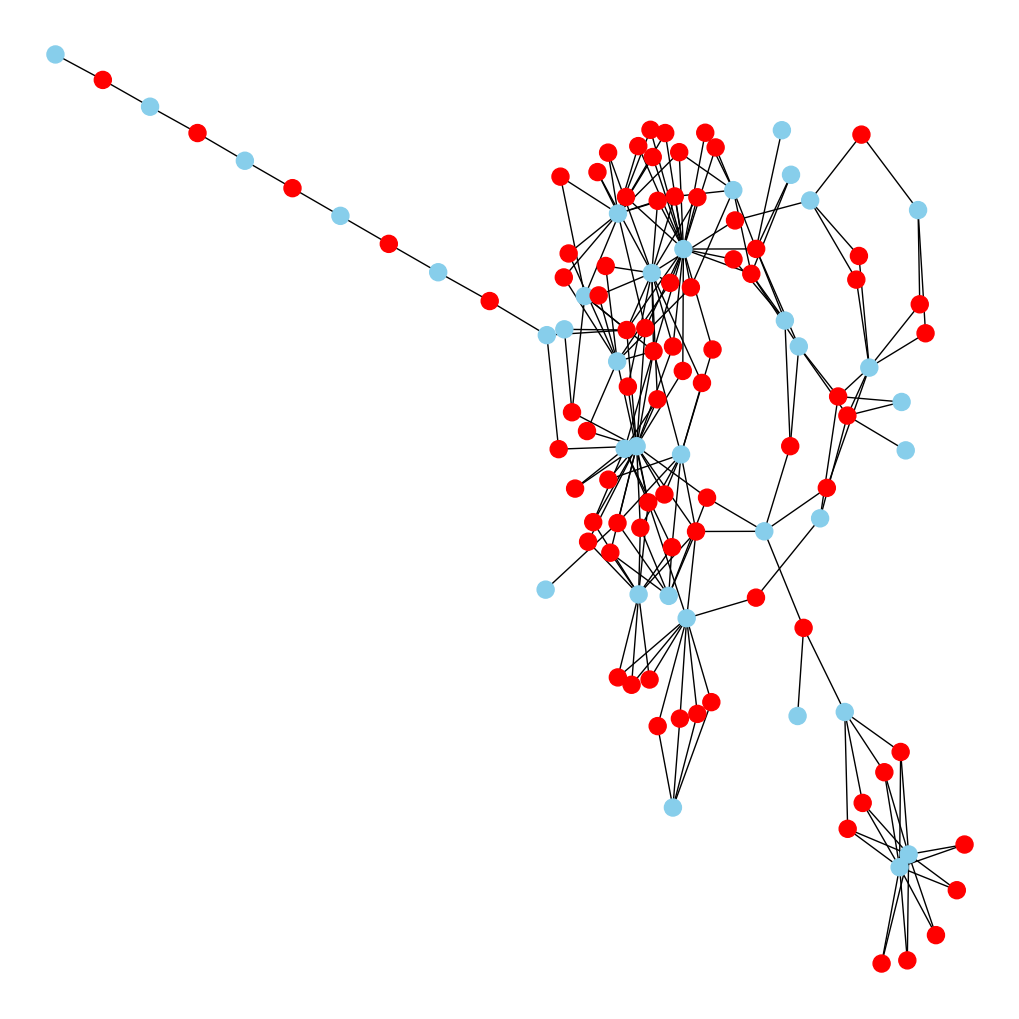

In [198]:
plt.figure(figsize=(10,10))

pos = nx.kamada_kawai_layout(smallGrap) # k regulates the distance between nodes

node_color = ["skyblue" if d["bipartite"]==1 else "red" for n, d in smallGrap.nodes(data=True)]

nx.draw(smallGrap, with_labels=False, node_color=node_color, #'skyblue', 
        node_size=150, edge_cmap=plt.cm.Blues, pos = pos)


# plt.show()
# plt.savefig(os.path.join(".", "BipartiteCloseUp.png"), dpi=300, format="png")

#### Embeddings

Using TSNE

In [199]:
from node2vec import Node2Vec

node2vec = Node2Vec(filteredEntityGraph, dimensions=5) 
model = node2vec.fit(window=10) 
embeddings = model.wv 

Generating walks (CPU: 1): 100%|██████████| 10/10 [02:29<00:00, 14.96s/it]


In [200]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2)
embedding2d=tsne.fit_transform(embeddings.vectors)

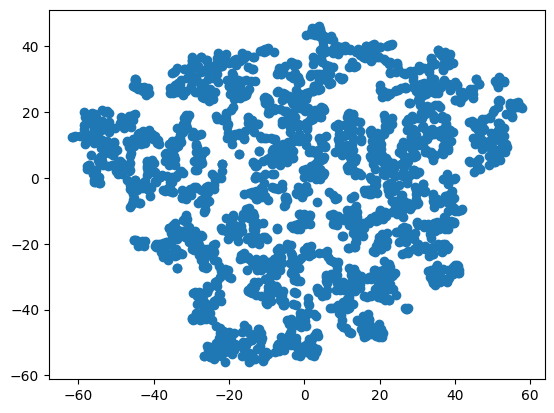

In [201]:
plt.plot(embedding2d[:, 0], embedding2d[:, 1], 'o')

Using Node2Vec

Node2Vec allows also to compute a similarity between entities

In [202]:
embeddings.most_similar(positive=["turkey"])

[('the soviet union', 0.9964755177497864),
 ('soviets', 0.9927986860275269),
 ('u.s. dlrs', 0.9914532899856567),
 ('hungary', 0.9854983687400818),
 ('northwest', 0.9837992191314697),
 ('program', 0.9822316765785217),
 ('egypt', 0.9821768999099731),
 ('grain', 0.9785342216491699),
 ('mills', 0.9750081896781921),
 ('usda', 0.9725624322891235)]

### Document-Document Graph Projection

In [203]:
from networkx.algorithms.bipartite.projection import overlap_weighted_projected_graph

In [204]:
documentGraph = overlap_weighted_projected_graph(
    G, 
    {n for n, d in G.nodes(data=True) if d["bipartite"] == 0}
)

In [218]:
comps = list(nx.connected_components(documentGraph))

In [205]:
from matplotlib import pyplot as plt

In [206]:
print(nx.info(documentGraph))

Name: 
Type: Graph
Number of nodes: 10788
Number of edges: 13028368
Average degree: 2415.3445


In [207]:
degrees = pd.Series({k: v for k, v in nx.degree(documentGraph)})

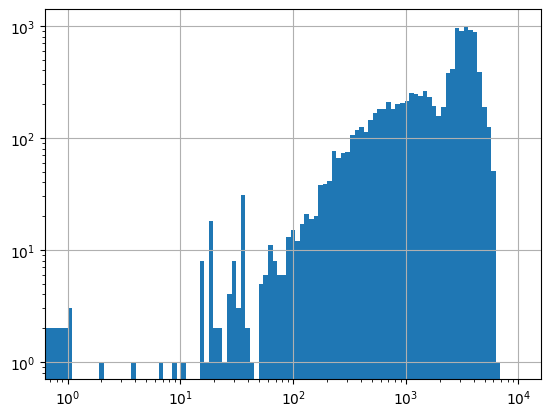

In [223]:
plotDistribution(degrees, 100, minValue=1E0)
plt.yscale("log")

In [224]:
allEdgesWeights = pd.Series({(d[0], d[1]): d[2]["weight"] for d in documentGraph.edges(data=True)})

/home/ubuntu/.pyenv/versions/py3.8/lib/python3.8/site-packages/matplotlib/axes/_axes.py:6703: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


(0.01, 1)

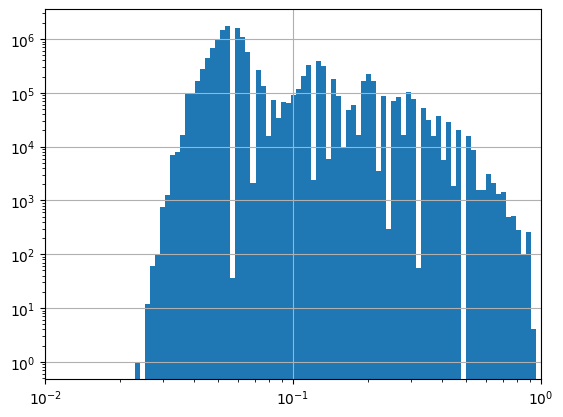

In [225]:
plotDistribution(allEdgesWeights, 100)
plt.yscale("log")
plt.xlim([1E-2, 1])

Text(0.5, 1.0, 'Edge Weight Distribution')

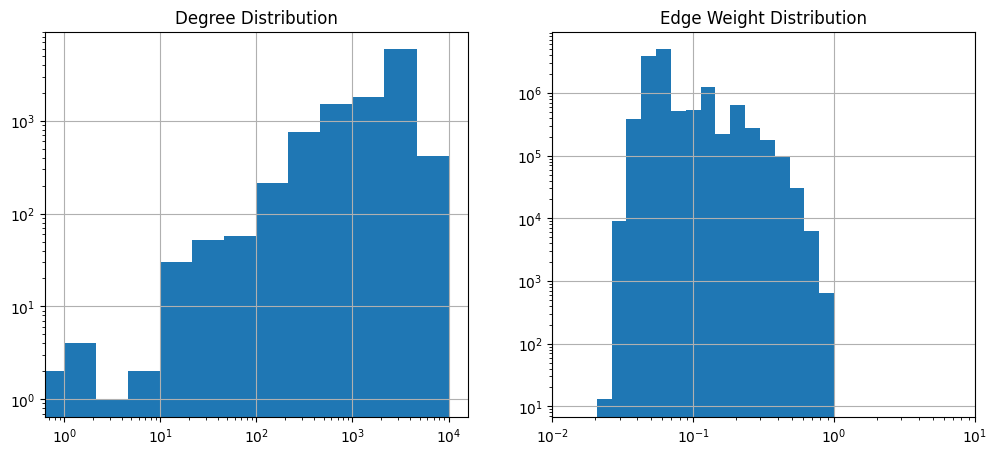

In [227]:
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plotDistribution(degrees, 13, minValue=1E0)
plt.yscale("log")
plt.title("Degree Distribution")

plt.subplot(1,2,2)
plotDistribution(allEdgesWeights, 20)
plt.xlim([1E-2, 10])
plt.yscale("log")
plt.title("Edge Weight Distribution")

In [228]:
filteredDocumentGraph = documentGraph.edge_subgraph(
    allEdgesWeights[(allEdgesWeights>0.6)].index.tolist()
)

In [229]:
print(nx.info(filteredDocumentGraph))

Name: 
Type: Graph
Number of nodes: 1967
Number of edges: 7965
Average degree:   8.0986


#### Global and Local Properties

In [230]:
degrees = pd.Series({k: v for k, v in nx.degree(filteredDocumentGraph)})

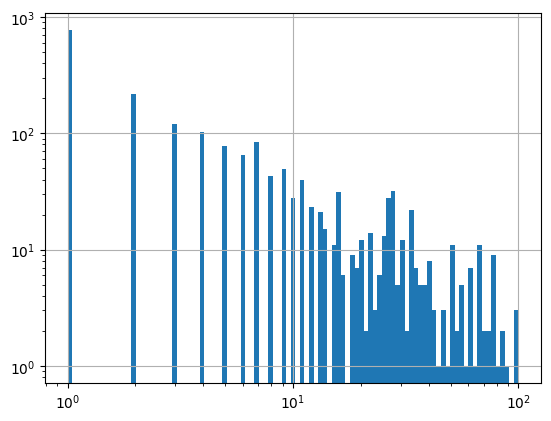

In [232]:
plotDistribution(degrees, 100, minValue=1E0)
plt.yscale("log")

In [233]:
allEdgesWeights = pd.Series({(d[0], d[1]): d[2]["weight"] for d in filteredDocumentGraph.edges(data=True)})

/home/ubuntu/.pyenv/versions/py3.8/lib/python3.8/site-packages/matplotlib/axes/_axes.py:6703: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


(0.1, 1)

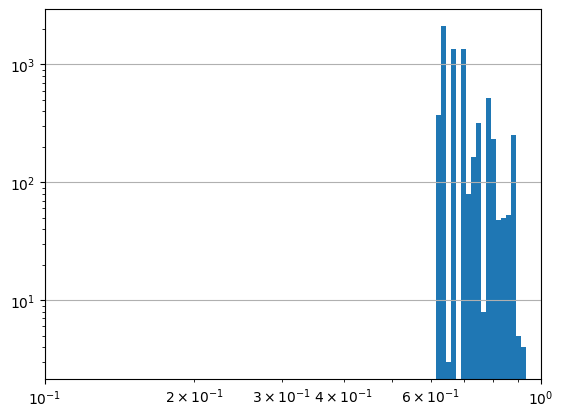

In [234]:
plotDistribution(allEdgesWeights, 100)
plt.yscale("log")
plt.xlim([1E-1, 1])

Text(0.5, 1.0, 'Edge Weight Distribution')

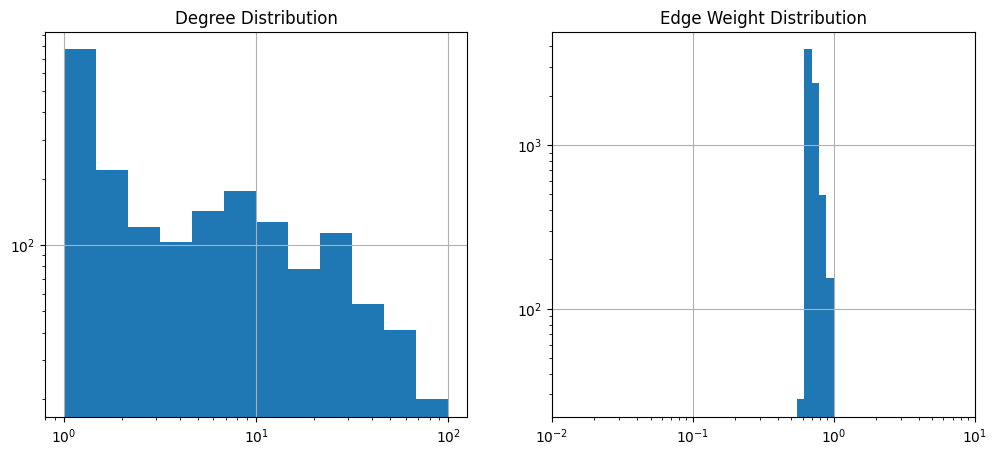

In [235]:
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plotDistribution(degrees, 13, minValue=1E0)
plt.yscale("log")
plt.title("Degree Distribution")

plt.subplot(1,2,2)
plotDistribution(allEdgesWeights, 20)
plt.xlim([1E-2, 10])
plt.yscale("log")
plt.title("Edge Weight Distribution")

#### Core - Periphery Description and Analysis

In [236]:
#Create network layout for visualizations
spring_pos = nx.spring_layout(filteredDocumentGraph)

In [237]:
default_edge_color = 'gray'
default_node_color = '#407cc9'
enhanced_node_color = '#f5b042'
enhanced_edge_color = '#cc2f04'

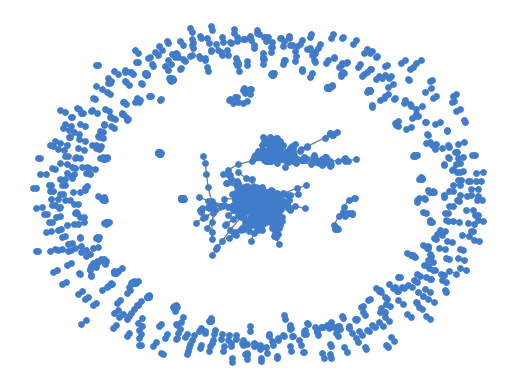

In [238]:
plt.axis("off")
nx.draw_networkx(filteredDocumentGraph, pos=spring_pos, node_color=default_node_color, 
                 edge_color=default_edge_color, with_labels=False, node_size=15)

In [239]:
components = pd.Series({ith: component 
              for ith, component in enumerate(nx.connected_components(filteredDocumentGraph))})

/home/ubuntu/.pyenv/versions/py3.8/lib/python3.8/site-packages/matplotlib/axes/_axes.py:6703: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


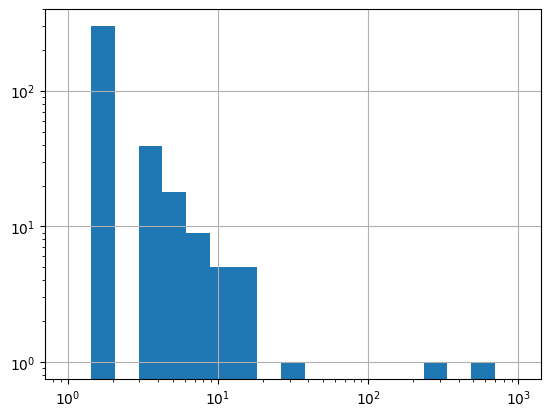

In [240]:
plotDistribution(components.apply(len), nbins=20)
plt.yscale("log")

In [241]:
coreDocumentGraph = nx.subgraph(
    filteredDocumentGraph,
    [node for nodes in components[components.apply(len)>8].values for node in nodes]
)

In [242]:
print(nx.info(coreDocumentGraph))

Name: 
Type: Graph
Number of nodes: 1069
Number of edges: 7190
Average degree:  13.4518


In [243]:
degrees = pd.Series({k: v for k, v in nx.degree(coreDocumentGraph)})

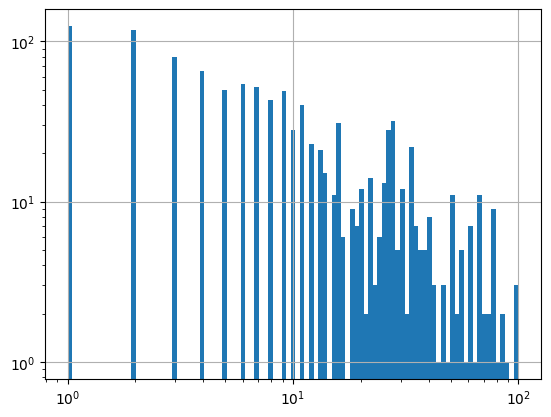

In [246]:
plotDistribution(degrees, 100, minValue=1E0)
plt.yscale("log")

In [247]:
allEdgesWeights = pd.Series({(d[0], d[1]): d[2]["weight"] for d in coreDocumentGraph.edges(data=True)})

/home/ubuntu/.pyenv/versions/py3.8/lib/python3.8/site-packages/matplotlib/axes/_axes.py:6703: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


(0.1, 1)

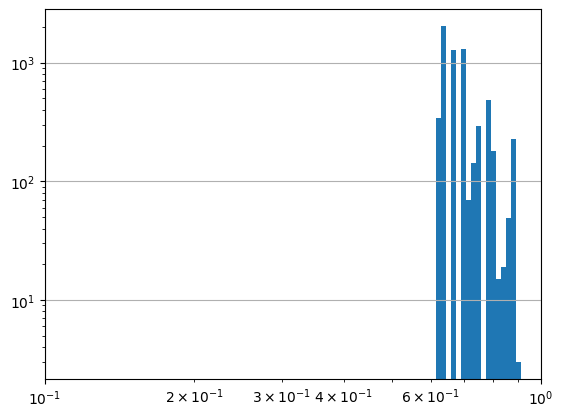

In [248]:
plotDistribution(allEdgesWeights, 100)
plt.yscale("log")
plt.xlim([1E-1, 1])

In [249]:
#Create network layout for visualizations
spring_pos = nx.spring_layout(coreDocumentGraph)

In [250]:
default_edge_color = 'gray'
default_node_color = '#407cc9'
enhanced_node_color = '#f5b042'
enhanced_edge_color = '#cc2f04'

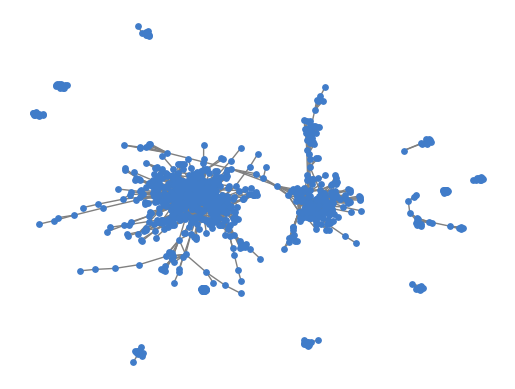

In [251]:
plt.axis("off")
nx.draw_networkx(coreDocumentGraph, pos=spring_pos, node_color=default_node_color, 
                 edge_color=default_edge_color, with_labels=False, node_size=15)

#### Community Detection and Topics Clustering

In [252]:
import community

In [253]:
communities = pd.Series(community.best_partition(coreDocumentGraph))

In [254]:
communities = pd.Series(community.best_partition(filteredDocumentGraph))

In [255]:
from collections import Counter

def getTopicRatio(df):
    return Counter([label for labels in df["label"] for label in labels])

In [256]:
communityTopics = pd.DataFrame.from_dict({
    cid: getTopicRatio(corpus.loc[comm.index])
    for cid, comm in communities.groupby(communities)
}, orient="index")

In [258]:
normalizedCommunityTopics = (communityTopics.T / communityTopics.sum(axis=1)).T

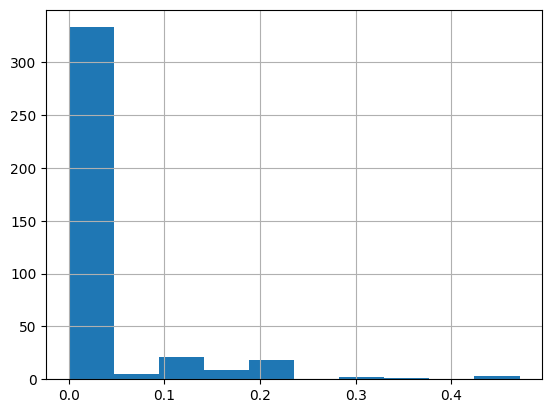

In [259]:
normalizedCommunityTopics.std(axis=1).fillna(0).hist()

Text(0.5, 0, 'Entropy')

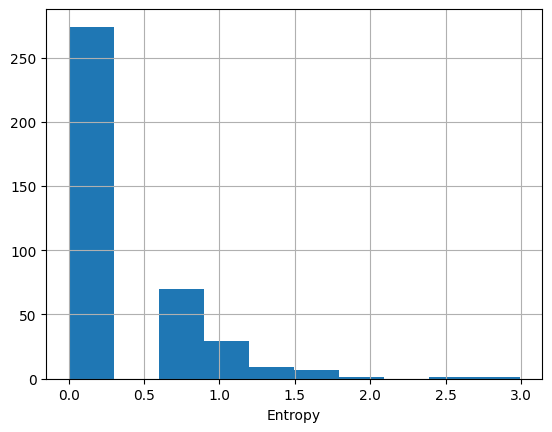

In [260]:
normalizedCommunityTopics.apply(lambda x: np.mean(-np.log(x)), axis=1).hist()
plt.xlabel("Entropy")

In [261]:
topicsCorrelation = normalizedCommunityTopics.corr().fillna(0)
topicsCorrelation[topicsCorrelation<0.8]=0

In [262]:
topicsGraph = nx.from_pandas_adjacency(topicsCorrelation)

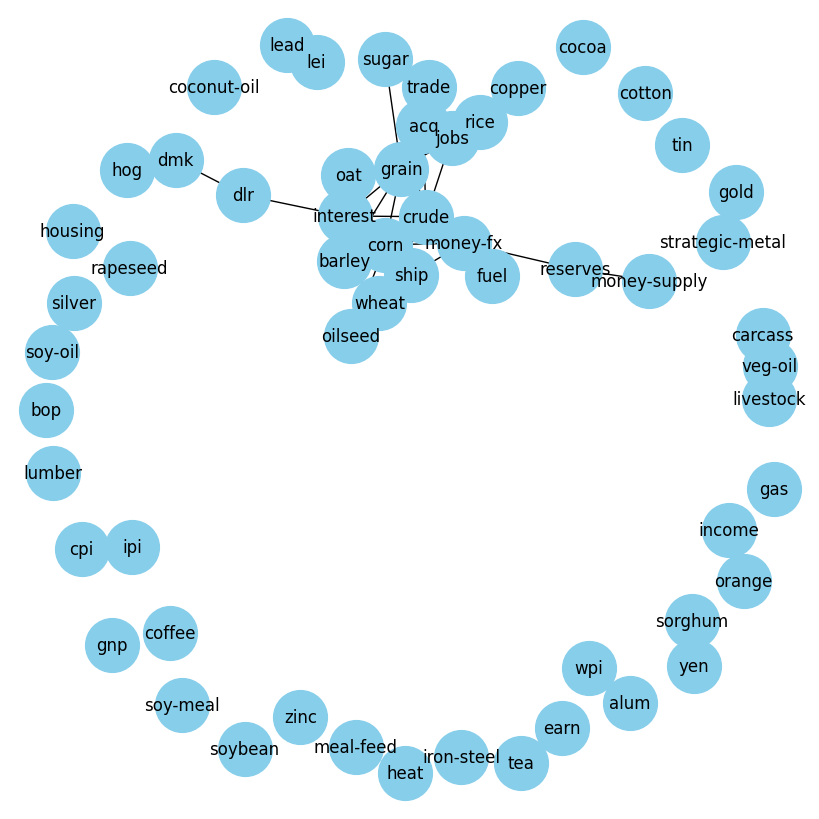

In [263]:
plt.figure(figsize=(8,8))

pos = nx.spring_layout(topicsGraph, k=0.35) # k regulates the distance between nodes

nx.draw(topicsGraph, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)

# plt.show()
# plt.savefig(os.path.join(".", "TopicsAll.png"), dpi=300, format="png")

In [264]:
filteredTopicsGraph = nx.subgraph(
    topicsGraph,
    [node for component in nx.connected_components(topicsGraph) if len(component)>3 for node in component]
)

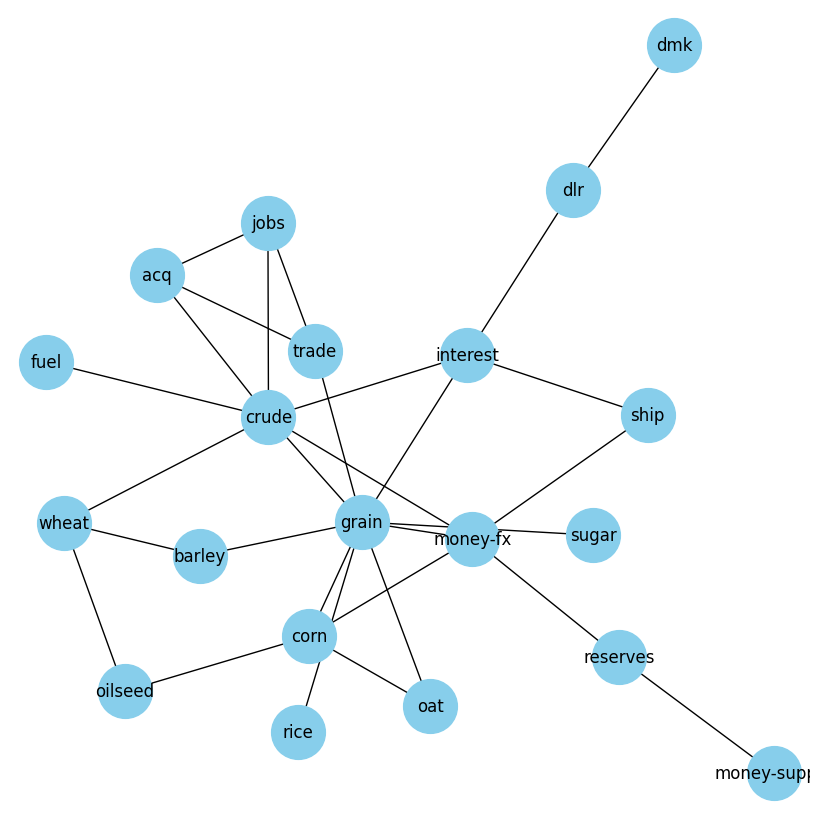

In [265]:
plt.figure(figsize=(8,8))

pos = nx.kamada_kawai_layout(filteredTopicsGraph) # k regulates the distance between nodes

nx.draw(filteredTopicsGraph, with_labels=True, node_color='skyblue', node_size=1500, 
        edge_cmap=plt.cm.Blues, pos = pos)

# plt.show()
# plt.savefig(os.path.join(".", "TopicsCore.png"), dpi=300, format="png")

#### Embeddings for the Document-Document Graph

In [266]:
from node2vec import Node2Vec

node2vec = Node2Vec(coreDocumentGraph, dimensions=20) 
model = node2vec.fit(window=10) 
embeddings = model.wv 

Generating walks (CPU: 1): 100%|██████████| 10/10 [01:14<00:00,  7.47s/it]


In [267]:
from sklearn.manifold import TSNE

tsne=TSNE(n_components=2)

In [268]:
embedding2d=tsne.fit_transform(embeddings.vectors)

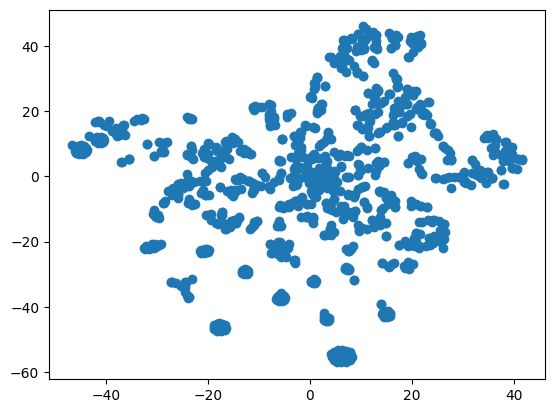

In [269]:
plt.plot(embedding2d[:, 0], embedding2d[:, 1], 'o')

In [270]:
pd.DataFrame(embeddings.vectors)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,3.197432,-1.750972,-2.929940,-0.212501,0.605700,1.195318,5.291937,1.113136,2.370286,1.781211,1.008049,4.031542,-0.603724,-1.999726,3.021189,-5.855838,-3.039752,0.766602,-4.042721,-2.470421
1,2.681675,-2.189247,-3.125820,-0.256105,0.774553,1.440798,5.620718,0.691377,2.003105,1.795850,1.040855,4.203146,-0.215560,-2.107549,2.835236,-5.876324,-2.814121,1.211978,-4.317563,-2.234109
2,2.632555,-1.943930,-2.991884,-0.615343,0.852351,1.500683,5.581306,0.622645,2.064309,1.579118,0.968756,4.208731,-0.156775,-1.885532,2.884104,-6.105623,-3.047131,0.566896,-4.265378,-2.599194
3,0.848469,0.953142,-2.072087,0.237624,-0.322329,3.670024,-1.267885,2.946059,-3.054304,-2.891550,-0.724649,1.855432,-4.262872,-3.028974,2.545823,-6.156187,-5.049411,-0.744120,-4.152863,-3.747691
4,1.154531,1.652047,-2.848552,1.000201,-2.575876,3.274477,2.676702,0.319381,-0.292584,-0.767831,1.201151,4.389406,-0.888768,-1.844007,0.832746,-5.668653,-2.470642,-1.277435,-5.166257,-4.143747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1064,-0.212567,0.218376,-0.241757,-0.903323,-0.006378,-0.095782,0.600772,-0.555060,-0.321036,0.169593,0.327486,-0.737584,0.596771,-1.106872,0.157099,0.288287,-1.382985,-0.939746,1.357912,1.046188
1065,0.271836,0.147609,-0.231285,-0.261595,-0.500089,-0.336575,0.267853,-0.086110,0.765752,0.160895,-0.644502,-0.284864,0.566267,0.546195,-0.659143,0.578052,0.400548,0.161820,0.323954,1.228579
1066,0.760134,0.280438,0.782161,0.636425,-1.237404,-0.229601,-0.113394,0.532407,-0.088801,-0.077423,0.878019,0.002787,0.483126,0.700369,-0.288098,0.565218,0.332213,-0.204960,0.824492,0.464240
1067,-0.331110,-0.039944,-0.516252,-0.129536,-0.318247,-0.482914,-0.036550,0.009137,-0.767936,0.159998,0.603504,-0.626420,0.521387,0.452857,-0.724136,0.249654,0.744439,-0.313976,0.445503,0.144294


In [271]:
pd.DataFrame(embeddings.vectors, index=embeddings.index2word)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
test/20368,3.197432,-1.750972,-2.929940,-0.212501,0.605700,1.195318,5.291937,1.113136,2.370286,1.781211,1.008049,4.031542,-0.603724,-1.999726,3.021189,-5.855838,-3.039752,0.766602,-4.042721,-2.470421
test/20221,2.681675,-2.189247,-3.125820,-0.256105,0.774553,1.440798,5.620718,0.691377,2.003105,1.795850,1.040855,4.203146,-0.215560,-2.107549,2.835236,-5.876324,-2.814121,1.211978,-4.317563,-2.234109
test/20442,2.632555,-1.943930,-2.991884,-0.615343,0.852351,1.500683,5.581306,0.622645,2.064309,1.579118,0.968756,4.208731,-0.156775,-1.885532,2.884104,-6.105623,-3.047131,0.566896,-4.265378,-2.599194
test/16715,0.848469,0.953142,-2.072087,0.237624,-0.322329,3.670024,-1.267885,2.946059,-3.054304,-2.891550,-0.724649,1.855432,-4.262872,-3.028974,2.545823,-6.156187,-5.049411,-0.744120,-4.152863,-3.747691
test/20800,1.154531,1.652047,-2.848552,1.000201,-2.575876,3.274477,2.676702,0.319381,-0.292584,-0.767831,1.201151,4.389406,-0.888768,-1.844007,0.832746,-5.668653,-2.470642,-1.277435,-5.166257,-4.143747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
training/11721,-0.212567,0.218376,-0.241757,-0.903323,-0.006378,-0.095782,0.600772,-0.555060,-0.321036,0.169593,0.327486,-0.737584,0.596771,-1.106872,0.157099,0.288287,-1.382985,-0.939746,1.357912,1.046188
training/1345,0.271836,0.147609,-0.231285,-0.261595,-0.500089,-0.336575,0.267853,-0.086110,0.765752,0.160895,-0.644502,-0.284864,0.566267,0.546195,-0.659143,0.578052,0.400548,0.161820,0.323954,1.228579
training/7843,0.760134,0.280438,0.782161,0.636425,-1.237404,-0.229601,-0.113394,0.532407,-0.088801,-0.077423,0.878019,0.002787,0.483126,0.700369,-0.288098,0.565218,0.332213,-0.204960,0.824492,0.464240
training/2562,-0.331110,-0.039944,-0.516252,-0.129536,-0.318247,-0.482914,-0.036550,0.009137,-0.767936,0.159998,0.603504,-0.626420,0.521387,0.452857,-0.724136,0.249654,0.744439,-0.313976,0.445503,0.144294


In [272]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 25904
Number of edges: 100729
Average degree:   7.7771


Extracting the embeddings to be used in shallow-learning models. Please do vary the *dimensions* and the *window* parameters to generate multiple combination to be cross-validated

In [273]:
from pathlib import Path
Path("./embeddings").mkdir(parents=True, exist_ok=True)

In [ ]:
from node2vec import Node2Vec

dimensions = 10
window = 20

node2vec = Node2Vec(G, dimensions=dimensions) 
model = node2vec.fit(window=window) 
embeddings = model.wv 

pd.DataFrame(embeddings.vectors, index=embeddings.index2word)\
    .to_pickle(f"./embeddings/bipartiteGraphEmbeddings_{dimensions}_{window}.p")

Generating walks (CPU: 1):  20%|██        | 2/10 [04:35<18:20, 137.55s/it]